**해당 노트북은 [이수안 컴퓨터 연구소 | 토픽모델링](https://www.youtube.com/watch?v=Xt607xhpF6U&list=PL7ZVZgsnLwEEoHQAElEPg7l7T6nt25I3N&index=6)의 강의 자료 및 강의를 참조하고 [위키독스 - 딥러닝을 활용한 자연어처리 입문|19강 토픽모델링](https://wikidocs.net/30707)의 내용을 기반으로 하는 복습내용을 더하여 작성하였습니다.**

# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음(DTM: Document term Metrix)에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

**[복습내용]**
* cf) Bow를 기반으로 하는 DTM이나 TF-IDF(문서내 빈도 - 역빈도)은 기본적으로 빈도 기반 표현방식이기 때문에 단어의 의미를 고려하지 못한다. 
    - 이를 해결하는 방법론으로 처음 LSA가 고안되었다. 
* LSA는 기본적으로 **특이값 분해(Sigular Value Decomposition, SVD)를 기반으로 한다. 
  
##### 특이값 분해 (SVD, Singular Value Decomposition) 
cf) 여기에서, svd는 실수 백터 공간에 한정하여 설명하고 있다.   

* SVD란 A가 (m x n)의 행렬일 때,
$$A = U\sum V^T$$ 
로 A를 분해하는 것을 의미한다.    
    - U : (m x m ) 직교행렬
    - ∑ : (m x n) 직사각 대각행렬, 이때, 대각행렬의 원소 값들이 **'특이값'** 
    - V^T : (n x n) 직교행렬
* 위에서 설명한 SVD를 풀 SVD(full SVD)라고 합니다. 하지만 LSA의 경우 풀 SVD에서 나온 3개의 행렬에서 일부 벡터들을 삭제시킨 절단된 SVD(truncated SVD)를 사용

* 절단된 SVD는 대각 행렬 Σ의 대각 원소의 값 중에서 상위값 t개만 남게 됩니다. 절단된 SVD를 수행하면 값의 손실이 일어나므로 기존의 행렬 A를 복구할 수 없습니다. 또한, U행렬과 V행렬의 t열까지만 남깁니다. 여기서 t는 우리가 찾고자하는 토픽의 수를 반영한 하이퍼파라미터값입니다. 하이퍼파라미터란 사용자가 직접 값을 선택하며 성능에 영향을 주는 매개변수를 말합니다. t를 선택하는 것은 쉽지 않은 일입니다. t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, t를 작게 잡아야만 노이즈를 제거할 수 있기 때문입니다.

* 이렇게 일부 벡터들을 삭제하는 것을 데이터의 차원을 줄인다고도 말하는데, 데이터의 차원을 줄이게되면 당연히 풀 SVD를 하였을 때보다 직관적으로 계산 비용이 낮아지는 효과를 얻을 수 있습니다.

* 하지만 계산 비용이 낮아지는 것 외에도 상대적으로 중요하지 않은 정보를 삭제하는 효과를 갖고 있는데, 이는 영상 처리 분야에서는 노이즈를 제거한다는 의미를 갖고 자연어 처리 분야에서는 설명력이 낮은 정보를 삭제하고 설명력이 높은 정보를 남긴다는 의미를 갖고 있습니다. 즉, 다시 말하면 기존의 행렬에서는 드러나지 않았던 심층적인 의미를 확인할 수 있게 해줍니다

* [LSA의 장점]
    - 쉽고 빠른 구현
    - 잠재적의미를 이끌어내어 유사도계산등에서 좋은성능을보임. 
* [LSA의 단점]
    - SVD특성상 이미계산되어있는 LSA에 새로운데이터를 추가해 계산하려고하면 보통처음부터 계산해야 한다. 
       -즉 새로운정보에 대해 업데이트가어렵다. 따라서 최근 Word2Vec 등의 신경망 기반 모형들이 각광을 받음


## 잠재 디리클레 할당(Latent Dirichlet Allocation)

**해당 정리의 내용은 [고려대학교 산업경영공학부 DSBA 연구실 | [Paper Review] Latent Dirichlet Allocation](https://www.youtube.com/watch?v=4AGjlcEQ6I8)의 동영상 강의를 참조했습니다.** 
##### 분류 모델의 종류 
* 분류 모델의 종류에는 크게 **Generative Model**과 **Discriminate Model**이 있습니다. 
* LDA는 Generative Model을 적용한 분류 방법에 속합니다. 
![분류모델의_종류](../../image/분류모델의_종류.png)
* Generative Model의 경우 
    - 분류의 기법들 중 하나로써, 
    - 전체 데이터를 여러개의 분포 집단 중, 특정 분포에 할당하는 방식을 의미합니다. 
    - Generative Model에서는 해당 데이터가 존재할 '확률'이 가장 큰 곳으로 해당 데이터를 할당합니다. 즉, 해당 데이터의 존재에 대한 최대 우도를 생성하는 방식으로 데이터를 분류합니다. 
* Disvriminate Model의 경우 
    - 분류의 기법들 중 하나로써, 
    - 특정 평면상의 데이터를 가장 잘 나누는 초평면을 찾는 방식입니다. 
    - 따라서, 데이터의 분포는 크게 중요하게 여기지 않고, 분류에 더욱 초점이 맞추어진 방식입니다. 
![분류모델의_종류2](../../image/분류모델의_종류2.png)
* 예를들어, Generative Model에서는 그림의 아래에 위치한 것과 같이, 새로운 데이터가 추가 되었을 때, 분포 A에 해당하는 우도가 분포 B에 해당하는 우도( == 0 ) 보다 높기 때문에 새로운 레코드는 분포 A에 속하는 것이 바람직 하다고 판단합니다. 
* 즉, Generative Model은 분류의 타당성과 당위성을 해석하기 용이하다고 할 수 있습니다. 

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

**[복습내용]** 

CF) LDA에서, 문서들은 여러 토픽(주제)들의 혼합으로 구성되어 있으며, 각각의 토픽들은 확률분포에 기반하여 단어들을 생성한다고 가정합니다. 따라서, LDA에서는 문서가 주어지면, 문서가 생성되던 단어를 역추적한다.   
  
**뭐라는 거니?**  
사람들이 글을 쓸때의 방식이 
1. 나는 이 문서를 작성하기위해서 이런 주제들을 넣을거고, 
2. 이런주제들을위해서는 이런단어들을넣을거야!   
로 이루어진다는게 골자   
  
  
1) 문서에 사용할 단어의 개수 N을 정합니다.
- Ex) 5개의 단어를 정하였습니다.
2) 문서에 사용할 토픽의 혼합을 확률 분포에 기반하여 결정합니다.
- Ex) 위 예제와 같이 토픽이 2개라고 하였을 때 강아지 토픽을 60%, 과일 토픽을 40%와 같이 선택할 수 있습니다.
3) 문서에 사용할 각 단어를 (아래와 같이) 정합니다.
3-1) 토픽 분포에서 토픽 T를 확률적으로 고릅니다.
- Ex) 60% 확률로 강아지 토픽을 선택하고, 40% 확률로 과일 토픽을 선택할 수 있습니다.
3-2) 선택한 토픽 T에서 단어의 출현 확률 분포에 기반해 문서에 사용할 단어를 고릅니다.
- Ex) 강아지 토픽을 선택하였다면, 33% 확률로 강아지란 단어를 선택할 수 있습니다. 이제 3)을 반복하면서 문서를 완성합니다.

이러한 과정을 통해 문서가 작성되었다는 가정 하에 LDA는 토픽을 뽑아내기 위하여 위 과정을 역으로 추적하는 역공학(reverse engneering)을 수행합니다.


##### LDA 수행 과정 
1) 사용자는 알고리즘에게 토픽의 개수 k를 알려줍니다.  
LDA는 토픽의 개수 k를 입력받으면, k개의 토픽이 M개의 전체 문서에 걸쳐 분포되어 있다고 가정합니다.

2) 모든 단어를 k개 중 하나의 토픽에 할당합니다.  
이제 LDA는 모든 문서의 모든 단어에 대해서 k개 중 하나의 토픽을 랜덤으로 할당합니다.  
이 작업이 끝나면 각 문서는 토픽을 가지며, 토픽은 단어 분포를 가지는 상태입니다.  
물론 랜덤으로 할당하였기 때문에 사실 이 결과는 전부 틀린 상태입니다.  
(만약 한 단어가 한 문서에서 2회 이상 등장하였다면, 각 단어는 서로 다른 토픽에 할당되었을 수도 있습니다.)

3) 이제 모든 문서의 모든 단어에 대해서 아래의 사항을 반복 진행합니다. (iterative)

3-1) 어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정합니다. 이에 따라 단어 w는 아래의 두 가지 기준에 따라서 토픽이 재할당됩니다.
- p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
- p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포

이를 반복하면, 모든 할당이 완료된 수렴 상태가 됩니다.

![LDA1.png](https://wikidocs.net/images/page/30708/lda1.PNG)

위의 그림은 두 개의 문서 doc1과 doc2를 보여줍니다. 여기서는 doc1의 세번째 단어 apple의 토픽을 결정하고자 합니다.
![LDA2.png](https://wikidocs.net/images/page/30708/lda3.PNG)
우선 첫번째로 사용하는 기준은 문서 doc1의 단어들이 어떤 토픽에 해당하는지를 봅니다. doc1의 모든 단어들은 토픽 A와 토픽 B에 50 대 50의 비율로 할당되어져 있으므로, 이 기준에 따르면 단어 apple은 토픽 A 또는 토픽 B 둘 중 어디에도 속할 가능성이 있습니다.


![LDA3.png](https://wikidocs.net/images/page/30708/lda2.PNG)
두번째 기준은 단어 apple이 전체 문서에서 어떤 토픽에 할당되어져 있는지를 봅니다. 이 기준에 따르면 단어 apple은 토픽 B에 할당될 가능성이 높습니다. 이러한 두 가지 기준을 참고하여 LDA는 doc1의 apple을 어떤 토픽에 할당할지 결정합니다.

## 데이터 준비

In [1]:
# 사이킷런의 데이터 셋을 활용합니다. 
# 20개의 분류를 가진 뉴스 데이터 입니다. 
from sklearn.datasets import fetch_20newsgroups 

In [2]:
# 데이터를 섞고, remove에 지정한 컬럼은 제외하고 가져옵니다. 
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                            remove=('headers','footers', 'quotes'))

# 데이터를 호출해 담습니다. 
documents = dataset.data 

In [3]:
print(len(documents))
print(documents[0])

11314
Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



### 텍스트 전처리 

In [4]:
# 텍스트 전처리를 진행합니다. 
import re 
import nltk 
from nltk.corpus import stopwords 
from gensim.parsing.preprocessing import preprocess_string 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wnsgn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# regular expression을 통해 문장 내 영어, 띄어쓰기를 제외한 모든 텍스트를 제거해줍니다. 
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

# 정규표현식을 이용해 stopwords를 제거해줍니다. 
def clean_stopwords(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

# 위의 함수는 가독성이 떨어져 같은 함수를 풀어서 정의합니다. 
def clean_stopwords2(d):
    stop_words = stopwords.words('english')
    
    # 문장 하나를 공백을 기준으로 나누어 준 뒤, 조건에 따라 제거 혹은 유지 후, 다시 붙여 문장 꼴로 만들어준다.  
    temp = []
    for w in d.split():
        if w not in stop_words and len(w)>3:
            temp.append(w.lower())
        else:
            pass 
    
    # ' '.join(['1','2','3']) --> '1 2 3' 즉, 결과 리스트를 ' '(띄어쓰기를 구분자로 연결)
    result_sentence = ' '.join(temp)
    return result_sentence 

def preprocessing(d):
    return preprocess_string(d)

In [6]:
# # clean stopwords 비교 테스트 
# print(clean_stopwords(documents[0]))
# print('\n\n')
# print(clean_stopwords2(documents[0]))

# # 같은 결과를 보입니다. 

In [7]:
import pandas as pd 

In [8]:
news_df = pd.DataFrame({'article':documents})
print(len(news_df))
news_df

11314


,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [9]:
# 빈 데이터 프레임을 제거해줍니다. 

# 컨텐츠가 없으면 NaN으로 전환  
news_df.replace("", float("NaN"), inplace=True)
# NaN 제거 
news_df.dropna(inplace=True)
#print 
print(len(news_df))
news_df

11096


,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [10]:
# 함수를 이용해 전처리를 진행합니다. 
# 반복문을 사용해도 되지만,df.apply(함수) 를 사용하면 훨씬 간편합니다. 
news_df['article'] = news_df['article'].apply(clean_text)
news_df

,article
0,Well im not sure about the story nad it did se...
1,\n\n\n\n\n\n\nYeah do you expect people to rea...
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,Well I will have to change the scoring on my p...
...,...
11309,Danny Rubenstein an Israeli journalist will be...
11310,\n
11311,\nI agree Home runs off Clemens are always me...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [11]:
news_df['article'] = news_df['article'].apply(clean_stopwords)
news_df

,article
0,well sure story seem biased what disagree stat...
1,yeah expect people read actually accept hard a...
2,although realize principle strongest points wo...
3,notwithstanding legitimate fuss proposal much ...
4,well change scoring playoff pool unfortunately...
...,...
11309,danny rubenstein israeli journalist speaking t...
11310,
11311,agree home runs clemens always memorable kinda...
11312,used deskjet orange micros grappler system upd...


In [12]:
# preprocessing을 진행합니다. 
# 해당 함수 호출 시, 토큰화가 진행됩니다. 
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
tokenized_news

[['sure',
  'stori',
  'bias',
  'disagre',
  'statement',
  'media',
  'ruin',
  'israel',
  'reput',
  'redicul',
  'media',
  'proisra',
  'media',
  'world',
  'have',
  'live',
  'europ',
  'realiz',
  'incid',
  'describ',
  'letter',
  'occur',
  'media',
  'ignor',
  'subsid',
  'israel',
  'exist',
  'european',
  'degre',
  'think',
  'reason',
  'report',
  'clearli',
  'atroc',
  'shame',
  'austria',
  'daili',
  'report',
  'inhuman',
  'act',
  'commit',
  'isra',
  'soldier',
  'bless',
  'receiv',
  'govern',
  'make',
  'holocaust',
  'guilt',
  'awai',
  'look',
  'jew',
  'treat',
  'race',
  'power',
  'unfortun'],
 ['yeah',
  'expect',
  'peopl',
  'read',
  'actual',
  'accept',
  'hard',
  'atheism',
  'need',
  'littl',
  'leap',
  'faith',
  'jimmi',
  'logic',
  'run',
  'steam',
  'sorri',
  'piti',
  'sorri',
  'feel',
  'denial',
  'faith',
  'need',
  'pretend',
  'happili',
  'mayb',
  'start',
  'newsgroup',
  'altatheisthard',
  'wont',
  'bummin',
  '

In [13]:
import numpy as np 
# 문장의 길이가 1 이하 인 문장은 제외합니다. 

# 1. 해당 조건에 포함되는 제거대상 문장의 인덱스를 받아옵니다. 
# drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence)<=1]
drop_news = [] 
for index, sentence in enumerate(tokenized_news):
    if len(sentence) <= 1:
        drop_news.append(index)

# 인덱스에 해당 하는 값들을 제거합니다. 
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))
news_texts

10926


C:\Users\wnsgn\anaconda3\lib\site-packages\numpy\lib\function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


array([list(['sure', 'stori', 'bias', 'disagre', 'statement', 'media', 'ruin', 'israel', 'reput', 'redicul', 'media', 'proisra', 'media', 'world', 'have', 'live', 'europ', 'realiz', 'incid', 'describ', 'letter', 'occur', 'media', 'ignor', 'subsid', 'israel', 'exist', 'european', 'degre', 'think', 'reason', 'report', 'clearli', 'atroc', 'shame', 'austria', 'daili', 'report', 'inhuman', 'act', 'commit', 'isra', 'soldier', 'bless', 'receiv', 'govern', 'make', 'holocaust', 'guilt', 'awai', 'look', 'jew', 'treat', 'race', 'power', 'unfortun']),
       list(['yeah', 'expect', 'peopl', 'read', 'actual', 'accept', 'hard', 'atheism', 'need', 'littl', 'leap', 'faith', 'jimmi', 'logic', 'run', 'steam', 'sorri', 'piti', 'sorri', 'feel', 'denial', 'faith', 'need', 'pretend', 'happili', 'mayb', 'start', 'newsgroup', 'altatheisthard', 'wont', 'bummin', 'byeby', 'dont', 'forget', 'flintston', 'chewabl', 'bake', 'timmon']),
       list(['realiz', 'principl', 'strongest', 'point', 'like', 'know', 'quest

## Gensim을 이용한 토픽 모델링

In [14]:
from gensim import corpora 

In [15]:
# courpora.Dictionary는 문서 내 모든 단어에 대해 정수 인코딩을 진행해 줍니다. 
dictionary = corpora.Dictionary(news_texts)
dictionary[0]

'act'

In [16]:
#이제 각 단어에 정수 인코딩을 하는 동시에, 각 문서에서의 단ㄷ어의 빈도수를 기록해본다. 
# 여기서는 각 단어를( word_id, word_frequency)의 형태로 바꾸고자 한다. 
# word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 문서에서의 해당 단어의 빈도수를 의미한다. 
# document -> bag of word 
corpus = [dictionary.doc2bow(text) for text in news_texts]
print(corpus[1])

[(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)]


In [18]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 2),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 4),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 2),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1)]

In [19]:
corpus[12]

[(41, 1),
 (173, 1),
 (309, 1),
 (488, 1),
 (1667, 1),
 (1969, 1),
 (1970, 1),
 (1971, 1),
 (1972, 1),
 (1973, 1),
 (1974, 1),
 (1975, 1),
 (1976, 1),
 (1977, 1),
 (1978, 1),
 (1979, 1)]

* 조회 결과, 단어들은 기본적으로 처음 등장한 순서를 기준으로 사전에 인덱싱 된다 

### 잠재 의미 분석을 위한 `LsiModel`

In [42]:
from gensim.models import LsiModel

# 토픽을 20개로 지정해 분류해봅니다. 
# 또한, 유념할 점은 입력으로 (정수인코딩,빈도)튜플의 리스트 문장 -> 리스트 문서 를 받습니다. 
# 단어:숫자 맵핑을 위해 생성한 딕셔너리를 넣어줍니다. 
lsi = LsiModel(corpus, num_topics= 20, id2word=dictionary)

topics = lsi.print_topics()
topics

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '-1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + -0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + -0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + -0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"'),
 (1,
  '0.393*"file" + 0.191*"program" + 0.158*"imag" + 0.126*"peopl" + 0.125*"avail" + 0.119*"inform" + 0.116*"includ" + 0.116*"entri" + 0.114*"work" + 0.112*"dont"'),
 (2,
  '0.456*"file" + -0.215*"peopl" + -0.210*"know" + -0.192*"said" + -0.176*"dont" + 0.158*"entri" + -0.158*"think" + -0.153*"stephanopoulo" + 0.139*"imag" + -0.129*"go"'),
 (3,
  '0.409*"file" + 0.286*"entri" + -0.241*"imag" + -0.168*"avail" + -0.141*"wire" + -0.136*"data" + -0.122*"version" + 0.116*"onam" + -0.109*"window" + 0.104*"said"'),
 (4,
  '-0.618*"wire" + -0.250*"ground" + -0.

In [23]:
# 토픽 갯수 k 개를 판단하도록 할수도 있습니다. 
from gensim.models.coherencemodel import CoherenceModel

# 단순히 지정한 범위 내에서 시뮬레이션을 하고 분류 성능에 따라 추천하는 듯 합니다. 
min_topics,max_topics = 20, 25 
coherence_scores = [] 

for num_topics in range(min_topics, max_topics):
    model = LsiModel(corpus, num_topics= num_topics, id2word=dictionary)
    coherence = CoherenceModel(model= model,
                               texts= news_texts,
                               dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())

In [24]:
print(coherence_scores)

[0.41015730646290416, 0.4061992393386219, 0.4045613940830542, 0.4301810825920381, 0.4103839544724905]


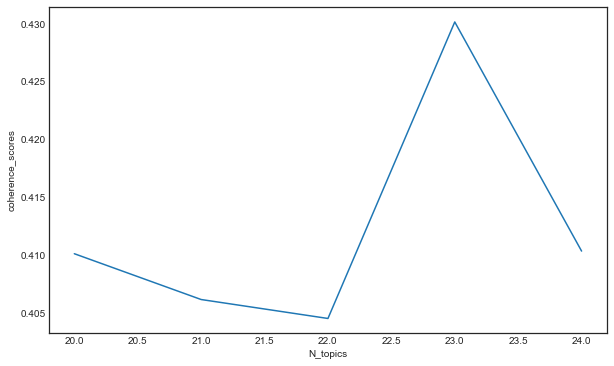

In [25]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics,max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('N_topics')
plt.ylabel('coherence_scores')

plt.show()

In [26]:
lsi = LsiModel(corpus, num_topics= 22, id2word=dictionary)

# 출력 defalt 20 -- > 22
topics = lsi.print_topics(num_topics=22)
topics

[(0,
  '-1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + -0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + -0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + -0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"'),
 (1,
  '0.393*"file" + 0.191*"program" + 0.158*"imag" + 0.126*"peopl" + 0.125*"avail" + 0.119*"inform" + 0.116*"includ" + 0.116*"entri" + 0.114*"work" + 0.112*"dont"'),
 (2,
  '-0.456*"file" + 0.215*"peopl" + 0.210*"know" + 0.192*"said" + 0.176*"dont" + -0.158*"entri" + 0.158*"think" + 0.153*"stephanopoulo" + -0.139*"imag" + 0.129*"go"'),
 (3,
  '0.409*"file" + 0.286*"entri" + -0.241*"imag" + -0.168*"avail" + -0.141*"wire" + -0.136*"data" + -0.122*"version" + 0.116*"onam" + -0.109*"window" + 0.104*"said"'),
 (4,
  '-0.618*"wire" + -0.250*"ground" + -0.188*

### 잠재 디리클레 할당을 위한 `LdaModel`

In [27]:
from gensim.models import LdaModel

In [28]:
lda_model = LdaModel(corpus=corpus, num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()

In [29]:
topics

[(0,
  '0.058*"file" + 0.030*"window" + 0.022*"program" + 0.015*"entri" + 0.011*"thank" + 0.009*"output" + 0.009*"problem" + 0.008*"imag" + 0.008*"email" + 0.008*"keyboard"'),
 (1,
  '0.008*"space" + 0.005*"state" + 0.005*"year" + 0.005*"report" + 0.004*"public" + 0.004*"nation" + 0.004*"peopl" + 0.003*"time" + 0.003*"april" + 0.003*"research"'),
 (2,
  '0.031*"jesu" + 0.012*"christ" + 0.008*"matthew" + 0.007*"believ" + 0.007*"heaven" + 0.007*"john" + 0.006*"come" + 0.005*"christian" + 0.005*"vers" + 0.005*"hell"'),
 (3,
  '0.016*"gordon" + 0.015*"bank" + 0.014*"skeptic" + 0.013*"surrend" + 0.013*"soon" + 0.012*"shame" + 0.012*"intellect" + 0.011*"njxp" + 0.011*"chastiti" + 0.011*"gebcadredslpittedu"'),
 (4,
  '0.017*"font" + 0.012*"detector" + 0.011*"radar" + 0.010*"xterm" + 0.005*"carb" + 0.004*"meter" + 0.004*"know" + 0.004*"convert" + 0.004*"dont" + 0.004*"compress"'),
 (5,
  '0.014*"drive" + 0.011*"work" + 0.009*"like" + 0.008*"know" + 0.008*"disk" + 0.008*"card" + 0.008*"problem"

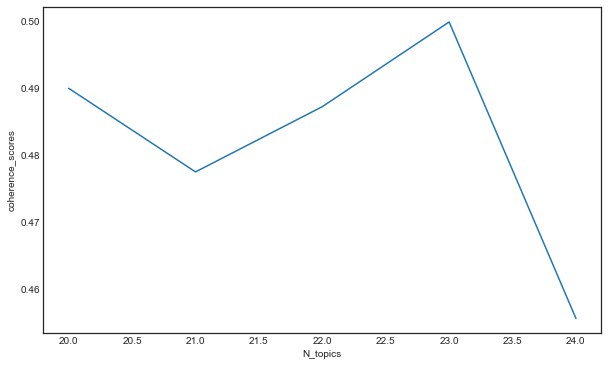

In [30]:
# 토픽 갯수 k 개를 판단하도록 할수도 있습니다. 
from gensim.models.coherencemodel import CoherenceModel

# 단순히 지정한 범위 내에서 시뮬레이션을 하고 분류 성능에 따라 추천하는 듯 합니다. 
min_topics,max_topics = 20, 25 
coherence_scores = [] 

for num_topics in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics= num_topics, id2word=dictionary)
    coherence = CoherenceModel(model= model,
                               texts= news_texts,
                               dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())

    
x = [int(i) for i in range(min_topics,max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('N_topics')
plt.ylabel('coherence_scores')

plt.show()

In [31]:
lda_model = LdaModel(corpus=corpus, num_topics=23, id2word=dictionary)
topics = lda_model.print_topics(num_topics=23)

In [32]:
topics 

[(0,
  '0.021*"imag" + 0.013*"data" + 0.009*"ripem" + 0.008*"entri" + 0.008*"program" + 0.007*"softwar" + 0.007*"avail" + 0.006*"format" + 0.006*"displai" + 0.006*"section"'),
 (1,
  '0.010*"tobacco" + 0.007*"peopl" + 0.006*"know" + 0.006*"weapon" + 0.006*"koresh" + 0.006*"right" + 0.005*"think" + 0.005*"dont" + 0.005*"go" + 0.005*"agent"'),
 (2,
  '0.013*"peopl" + 0.007*"post" + 0.006*"like" + 0.006*"exist" + 0.006*"reason" + 0.006*"right" + 0.005*"dont" + 0.005*"know" + 0.005*"question" + 0.005*"evid"'),
 (3,
  '0.010*"armenian" + 0.009*"washington" + 0.008*"state" + 0.006*"million" + 0.006*"kill" + 0.006*"prison" + 0.006*"peopl" + 0.006*"boston" + 0.006*"island" + 0.005*"year"'),
 (4,
  '0.014*"disk" + 0.014*"card" + 0.013*"drive" + 0.009*"cabl" + 0.009*"copi" + 0.008*"control" + 0.007*"hard" + 0.006*"floppi" + 0.006*"motherboard" + 0.006*"simm"'),
 (5,
  '0.007*"reaction" + 0.006*"peopl" + 0.006*"atheist" + 0.005*"price" + 0.005*"dont" + 0.005*"like" + 0.005*"thing" + 0.005*"restau

## 토픽 모델링 시각화

In [40]:
# pip install pyLDAvis

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
import pyLDAvis.gensim_models

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
topictable = make_topictable_per_doc(lda_model, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,17.0,0.5597,"[(5, 0.018287117), (14, 0.40651053), (17, 0.55..."
1,1,2.0,0.6706,"[(2, 0.6706305), (14, 0.27650645), (20, 0.0273..."
2,2,2.0,0.3799,"[(2, 0.37994367), (12, 0.27009353), (14, 0.055..."
3,3,15.0,0.5027,"[(9, 0.031346753), (12, 0.254836), (13, 0.1968..."
4,4,7.0,0.5306,"[(7, 0.53062606), (12, 0.43554837)]"
5,5,14.0,0.6503,"[(14, 0.6502834), (18, 0.30167675)]"
6,6,13.0,0.3272,"[(4, 0.21665624), (5, 0.032271747), (10, 0.181..."
7,7,13.0,0.3727,"[(3, 0.32326078), (12, 0.28696194), (13, 0.372..."
8,8,12.0,0.9133,"[(12, 0.9133056), (22, 0.059937686)]"
9,9,13.0,0.3135,"[(12, 0.30255246), (13, 0.31347674), (15, 0.06..."


## Scikit-learn을 활용한 실습

In [45]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups 
from nltk.corpus import stopwords 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


샘플의 수 : 11314


In [48]:
documents[1]

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [49]:
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 텍스트 전처리 

In [50]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-b4124dfb5e6a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [51]:
news_df['clean_doc'][1]

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [52]:
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LSA(Latent symentic anlysis) 실습 

#### TF-IDF 행렬 구성 
불용어 제거를 위해 토큰화 작업을 수행하였지만, TfidfVectorizer(TF-IDF 실습 참고)는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용합니다. 그렇기 때문에 TfidfVectorizer를 사용해서 TF-IDF 행렬을 만들기 위해서 다시 토큰화 작업을 역으로 취소하는 작업을 수행해보도록 하겠습니다. 이를 역토큰화(Detokenization)라고 합니다.

In [55]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
news_df['clean_doc'][1]

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

정상적으로 불용어가 제거된 상태에서 역토큰화가 수행되었음을 확인할 수 있습니다.

이제 사이킷런의 TfidfVectorizer를 통해 단어 1,000개에 대한 TF-IDF 행렬을 만들 것입니다. 물론 텍스트 데이터에 있는 모든 단어를 가지고 행렬을 만들 수는 있겠지만, 여기서는 1,000개의 단어로 제한하도록 하겠습니다.

In [57]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, # 상위 1,000개의 단어를 보존 
                             max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TF-IDF 행렬의 크기 : (11314, 1000)


#### 토픽모델링 진행 
이제 TF-IDF 행렬을 다수의 행렬로 분해해보도록 하겠습니다. 여기서는 사이킷런의 절단된 SVD(Truncated SVD)를 사용합니다. 절단된 SVD를 사용하면 차원을 축소할 수 있습니다. 원래 기존 뉴스그룹 데이터가 20개의 카테고리를 갖고있었기 때문에, 20개의 토픽을 가졌다고 가정하고 토픽 모델링을 시도해보겠습니다. 토픽의 숫자는 n_components의 파라미터로 지정이 가능합니다.

In [58]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)
# 여기서 svd_model.componets_는 앞서 배운 LSA에서 VT에 해당됩니다.

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20

In [59]:
np.shape(svd_model.components_)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 1000)

In [61]:
svd_model.components_

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.01469447,  0.05019033,  0.02132607, ...,  0.07865965,
         0.01432356,  0.01788786],
       [-0.00535706,  0.01653897, -0.01644943, ..., -0.0635444 ,
        -0.01063538, -0.01905089],
       [ 0.00172364, -0.00364954, -0.01799981, ...,  0.05876243,
         0.0262722 ,  0.02236444],
       ...,
       [-0.01119135,  0.00486264,  0.00307659, ...,  0.01869445,
        -0.00064808,  0.00032117],
       [ 0.00206029,  0.01546828,  0.01100956, ..., -0.09165235,
        -0.00111648, -0.00530245],
       [ 0.00197576, -0.03695809, -0.00546641, ...,  0.03533267,
        -0.01475702, -0.0039975 ]])

In [63]:
vectorizer.get_feature_names()

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ability',
 'able',
 'accept',
 'access',
 'according',
 'account',
 'action',
 'actions',
 'actual',
 'actually',
 'added',
 'addition',
 'additional',
 'address',
 'administration',
 'advance',
 'advice',
 'agencies',
 'agree',
 'algorithm',
 'allow',
 'allowed',
 'allows',
 'amendment',
 'america',
 'american',
 'americans',
 'analysis',
 'angeles',
 'anonymous',
 'answer',
 'answers',
 'anti',
 'anybody',
 'apparently',
 'appear',
 'appears',
 'apple',
 'application',
 'applications',
 'apply',
 'appreciate',
 'appreciated',
 'approach',
 'appropriate',
 'april',
 'arab',
 'archive',
 'area',
 'areas',
 'argument',
 'arguments',
 'armenia',
 'armenian',
 'armenians',
 'arms',
 'army',
 'article',
 'articles',
 'asked',
 'asking',
 'assume',
 'assuming',
 'atheism',
 'atheists',
 'attack',
 'attempt',
 'author',
 'authority',
 'available',
 'average',
 'avoid',
 'away',
 'background',
 'base',
 'baseball',
 'based',
 'basic',
 'basically',
 'basis',
 'begin',
 'beginning',
 'belief

정확하게 토픽의 수 t × 단어의 수의 크기를 가지는 것을 볼 수 있습니다.

In [60]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA 

In [80]:
import pandas as pd
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
# # 데이터를 불러옵니다. 강의안과는 다르게, 기존에 사용하던 데이터를 그대로 사용합니다. 
text = news_df[['document']]
text

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


#### 전처리 

In [76]:
text['document'] = text['document'].apply(clean_text)
text['document'] = text['document'].apply(clean_stopwords)
tokenized_news = text['document'].apply(preprocessing)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-76-996c7921aa42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['document'] = text['document'].apply(clean_text)
<ipython-input-76-996c7921aa42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [77]:
tokenized_news

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [sure, stori, bias, disagre, statement, media,...
1        [yeah, expect, peopl, read, actual, accept, ha...
2        [realiz, principl, strongest, point, like, kno...
3        [notwithstand, legitim, fuss, propos, chang, a...
4        [chang, score, playoff, pool, unfortun, dont, ...
                               ...                        
11309    [danni, rubenstein, isra, journalist, speak, t...
11310                                                   []
11311    [agre, home, run, clemen, memor, kinda, like, ...
11312    [deskjet, orang, micro, grappler, updat, kanji...
11313    [argument, murphi, scare, hell, came, year, ha...
Name: document, Length: 11314, dtype: object

#### TF-IDF 행렬 구성 

In [78]:
# 상위 1,000개의 단어를 보존 
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
X = vectorizer.fit_transform(text['document'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TF-IDF 행렬의 크기 : (11314, 1000)


In [81]:
lda_model = LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
lda_top = lda_model.fit_transform(X)

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[ 9.35232606 18.7027717   6.02644886 ... 10.26002542 20.49128579
   7.16804325]
 [ 0.10086242  0.1774162   1.77470962 ...  0.81552923  0.54953246
   0.10189667]
 [ 5.01118549 41.97035436  6.57166376 ...  0.2265528  13.93097471
   2.17506212]
 ...
 [ 0.1011575   0.21772771  0.1010093  ...  0.10111013  0.10277443
   0.10091236]
 [ 0.10213891  0.11999177  0.10146336 ...  0.10478309  0.12541263
   0.10156703]
 [ 0.11238453  0.10438183  0.70311598 ...  0.28429757  0.68165867
   0.10410738]]
(10, 1000)


C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# 단어 집합. 1,000개의 단어가 저장됨.
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)

Topic 1: [('people', 120.43), ('dont', 94.31), ('government', 84.48), ('think', 81.29), ('like', 73.39)]
Topic 2: [('israel', 61.04), ('israeli', 43.34), ('jews', 34.16), ('arab', 24.85), ('jewish', 24.42)]
Topic 3: [('thanks', 173.3), ('email', 134.89), ('know', 129.21), ('windows', 127.14), ('like', 107.85)]
Topic 4: [('bike', 63.46), ('like', 52.38), ('good', 37.07), ('dont', 33.5), ('miles', 32.25)]
Topic 5: [('game', 89.27), ('team', 77.6), ('games', 75.52), ('year', 63.83), ('players', 58.48)]
Topic 6: [('people', 94.58), ('dont', 79.82), ('think', 75.68), ('jesus', 74.46), ('believe', 71.66)]
Topic 7: [('condition', 27.17), ('sale', 23.28), ('excellent', 21.48), ('asking', 18.96), ('picture', 17.3)]
Topic 8: [('printer', 37.19), ('print', 28.38), ('scsi', 22.03), ('michael', 17.94), ('page', 10.98)]
Topic 9: [('mike', 17.16), ('wondering', 15.61), ('just', 15.12), ('maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', 13.35), ('folks', 11.29)]
Topic 10: [('space', 39.13), ('science', 29.52), ('sat

C:\Users\wnsgn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
